In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance #base do yahoo

yfinance.pdr_override() #corrigir

In [25]:
df_carteira = pd.read_excel("Carteira.xlsx")

display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


In [26]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

lista_ativos = list(df_carteira["Ativos"].astype(str)+'.SA') # adicionando o .SA

print(lista_ativos)

df_cotacoes = pdr.get_data_yahoo(lista_ativos,data_inicial,data_final)["Adj Close"]

display(df_cotacoes)

['BOVA11.SA', 'SMAL11.SA', 'MGLU3.SA', 'BBDC4.SA', 'ITUB4.SA', 'ENEV3.SA', 'MOVI3.SA', 'BPAC11.SA', 'NTCO3.SA', 'BCRI11.SA', 'VILG11.SA', 'KNRI11.SA', 'XPLG11.SA']


[*********************100%%**********************]  13 of 13 completed


Ticker,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2023-05-05,13.985152,60.362595,101.910004,23.328510,11.44,24.167532,140.442841,3.563581,9.20,10.346702,91.449997,89.437057,94.159767
2023-05-08,14.505927,60.443062,102.489998,23.592384,11.34,24.502293,140.489456,3.619701,9.49,10.402081,92.300003,91.456619,94.150375
2023-05-09,14.363896,60.720299,103.800003,23.944218,11.38,24.651073,141.561172,3.872238,9.77,11.971163,92.760002,91.028503,95.248306
2023-05-10,14.392302,61.131641,103.970001,24.432875,11.65,25.013727,139.837082,4.012537,9.95,11.869632,94.199997,90.321205,95.717514
2023-05-11,14.581676,63.277866,104.820000,24.980171,11.60,25.255497,141.374786,4.068656,10.59,11.925012,95.599998,89.464989,96.346237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22,13.580000,71.120003,121.800003,33.320000,12.44,31.530001,163.610001,1.530000,7.31,16.049999,101.110001,94.489998,106.089996
2024-04-23,13.670000,70.000000,121.410004,32.750000,12.45,32.000000,162.830002,1.440000,7.20,16.700001,100.900002,93.599998,106.000000
2024-04-24,13.670000,69.690002,120.970001,32.750000,12.50,31.860001,162.710007,1.430000,7.17,16.440001,99.980003,93.120003,104.800003


In [27]:
df_cotacoes.info()

df_cotacoes = df_cotacoes.ffill() #Pegando o valor anterior e preenchendo o nulo

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-05-05 to 2024-04-26
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   245 non-null    float64
 1   BCRI11.SA  245 non-null    float64
 2   BOVA11.SA  245 non-null    float64
 3   BPAC11.SA  245 non-null    float64
 4   ENEV3.SA   245 non-null    float64
 5   ITUB4.SA   245 non-null    float64
 6   KNRI11.SA  245 non-null    float64
 7   MGLU3.SA   245 non-null    float64
 8   MOVI3.SA   245 non-null    float64
 9   NTCO3.SA   245 non-null    float64
 10  SMAL11.SA  245 non-null    float64
 11  VILG11.SA  245 non-null    float64
 12  XPLG11.SA  245 non-null    float64
dtypes: float64(13)
memory usage: 26.8 KB


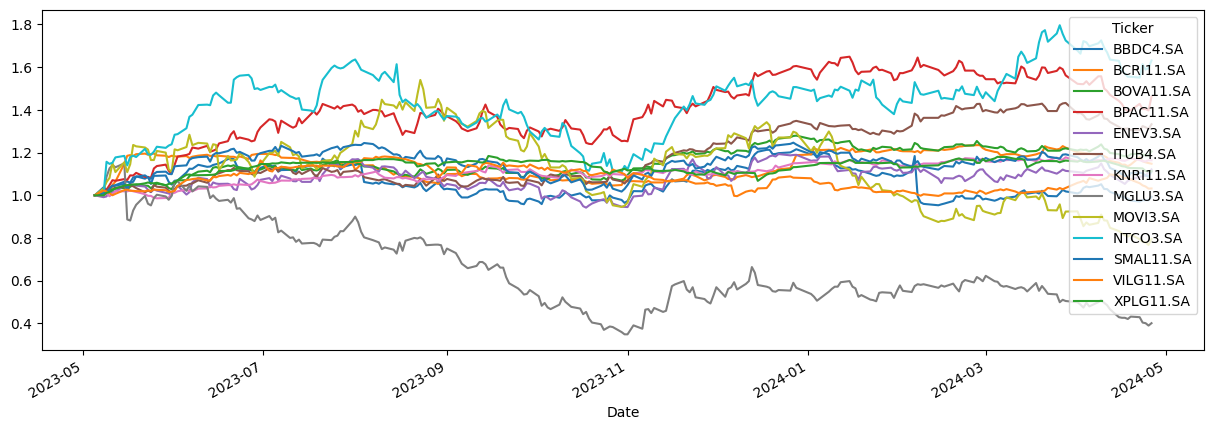

In [28]:
#normalizar a base de dados
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]

df_cotacoes_norm.plot(figsize = (15,5))
plt.show()



In [29]:
df_cotacoes_ibov = pdr.get_data_yahoo("^BVSP",data_inicial,data_final)["Adj Close"]
display(df_cotacoes_ibov)


[*********************100%%**********************]  1 of 1 completed


Date
2023-05-05    105148.0
2023-05-08    106042.0
2023-05-09    107114.0
2023-05-10    107448.0
2023-05-11    108256.0
                ...   
2024-04-22    125573.0
2024-04-23    125148.0
2024-04-24    124741.0
2024-04-25    124646.0
2024-04-26    126526.0
Name: Adj Close, Length: 245, dtype: float64